In [13]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"

Snapshot_Init = 33
Snapshot_End = 99
Lbsg_Indcies_Array = np.array(
    [117251, 300903, 324123, 329508, 382215,
        400973, 419618, 457431, 460722, 490814]
)

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3

Redshift = np.array([20.05, 14.99, 11.98, 10.98, 10.00, 9.39, 9.00, 8.45, 8.01, 7.60,
                     7.24, 7.01, 6.49, 6.01, 5.85, 5.53, 5.23, 5.00, 4.66, 4.43,
                     4.18, 4.01, 3.71, 3.49, 3.28, 3.01, 2.90, 2.73, 2.58, 2.44,
                     2.32, 2.21, 2.10, 2.00, 1.90, 1.82, 1.74, 1.67, 1.60, 1.53,
                     1.50, 1.41, 1.36, 1.30, 1.25, 1.21, 1.15, 1.11, 1.07, 1.04,
                     1.00, 0.95, 0.92, 0.89, 0.85, 0.82, 0.79, 0.76, 0.73, 0.70,
                     0.68, 0.64, 0.62, 0.60, 0.58, 0.55, 0.52, 0.50, 0.48, 0.46,
                     0.44, 0.42, 0.40, 0.38, 0.36, 0.35, 0.33, 0.31, 0.30, 0.27,
                     0.26, 0.24, 0.23, 0.21, 0.20, 0.18, 0.17, 0.15, 0.14, 0.13,
                     0.11, 0.10, 0.08, 0.07, 0.06, 0.05, 0.03, 0.02, 0.01, 0.00])

Host_Index_At_99 = 329508

Host_Index_At_98 = 329045
Satellite_Index_At_98 = 329051



In [32]:
Subhalo_Dict=il.groupcat.loadSingle(basePath,Snapshot_End,-1,Host_Index_At_99)

Host_Tree=il.sublink.loadTree(basePath,Snapshot_End-1,Host_Index_At_98,['SubfindID','SnapNum','SubhaloMass'],onlyMPB=1)

Satellite_Tree=il.sublink.loadTree(basePath,Snapshot_End-1,Satellite_Index_At_98,['SubfindID','SnapNum','SubhaloMass'],onlyMPB=1)


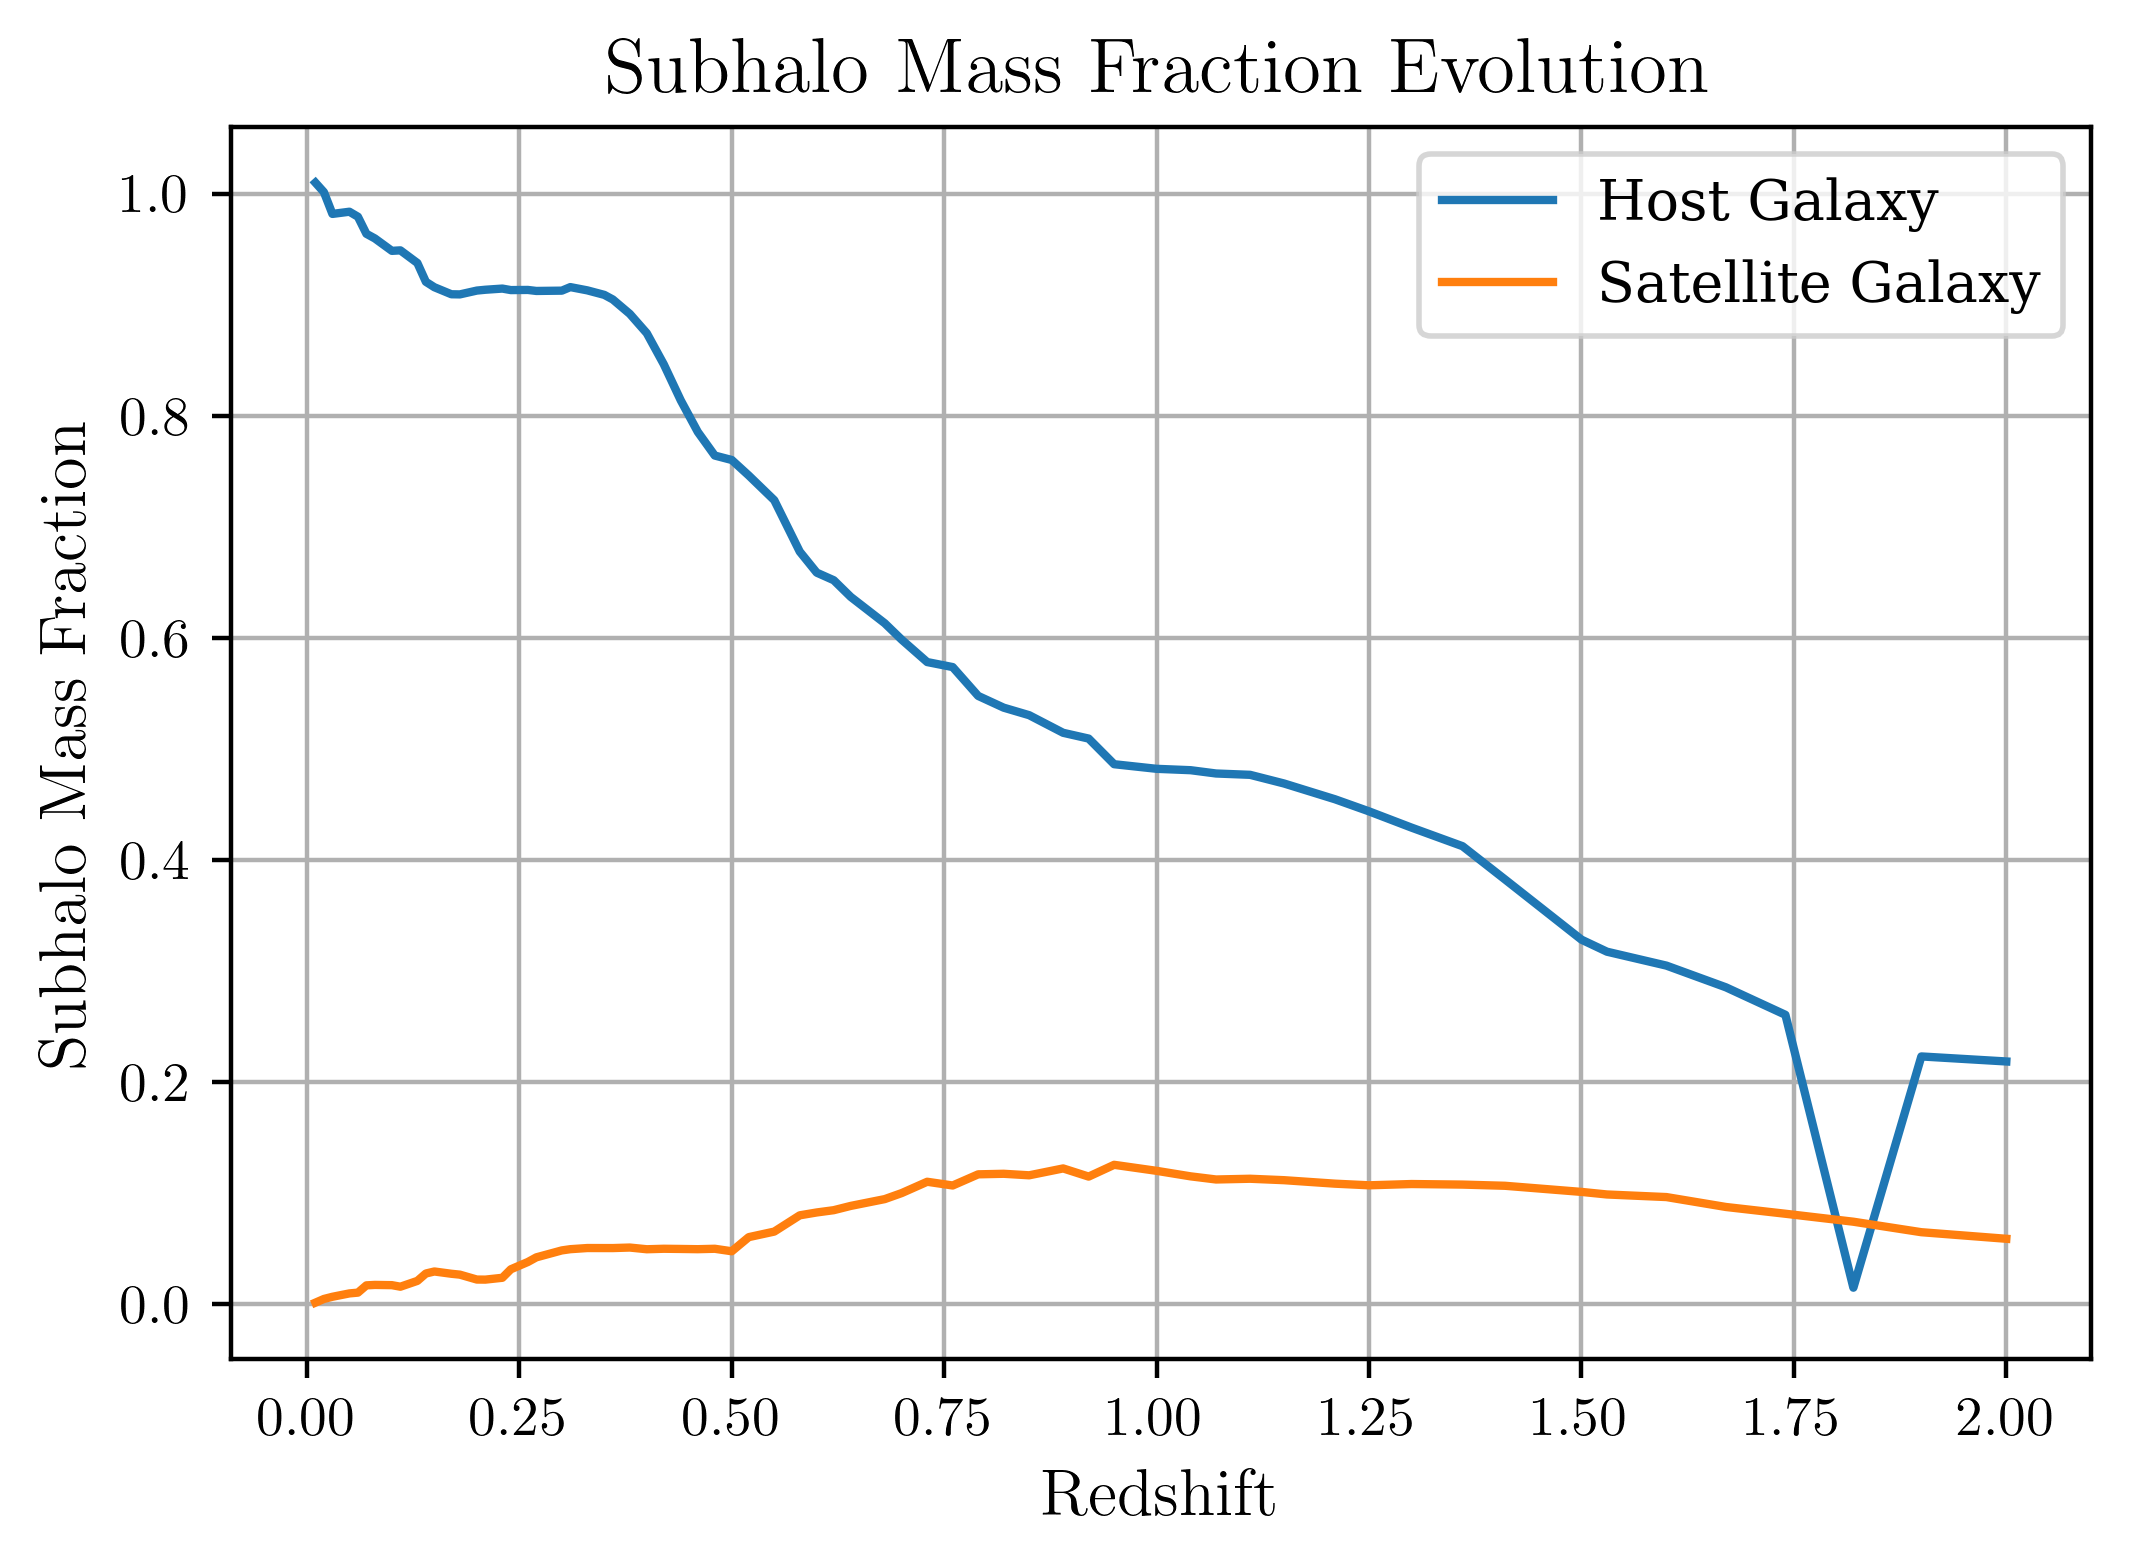

In [59]:
plt.figure(figsize=(6,4),dpi=400)
plt.plot(Redshift[::-1][1:67],Host_Tree['SubhaloMass'][:66]/Subhalo_Dict['SubhaloMass'],label='Host Galaxy')
plt.plot(Redshift[::-1][1:67],Satellite_Tree['SubhaloMass'][:66]/Subhalo_Dict['SubhaloMass'],label='Satellite Galaxy')

plt.xlabel(r'Redshift', usetex=True, fontsize=12)
plt.ylabel(r'Subhalo Mass Fraction', usetex=True, fontsize=12)
plt.title('Subhalo Mass Fraction Evolution', usetex=True, fontsize=14)

# 设置坐标轴刻度字体
plt.xticks(fontsize=10,usetex=1)
plt.yticks(fontsize=10,usetex=1)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "DejaVu Serif"

plt.grid()
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_family("DejaVu Serif")

# 添加图例
plt.legend()


In [ ]:
for Snapshot,Host_Index,Satellite_Index in zip(Host_Tree['SnapNum'][:66],Host_Tree['SubfindID'][:66],Satellite_Tree['SubfindID'][:66]):
    
